# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [2]:
# if plotnine is not installed in Jupter then use the following command to install it 
%pip install plotnine


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 5.3 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scprep 1.2.3 requires pandas<2.1,>=0.25, but you have pandas 2.2.1 which is incompatible.

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Running this project require the following imports 

In [3]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

In [4]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



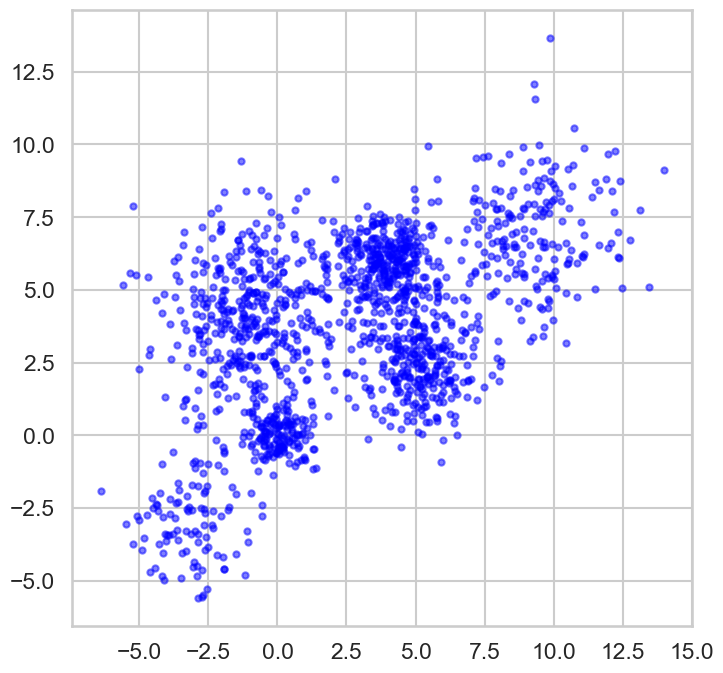

In [5]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

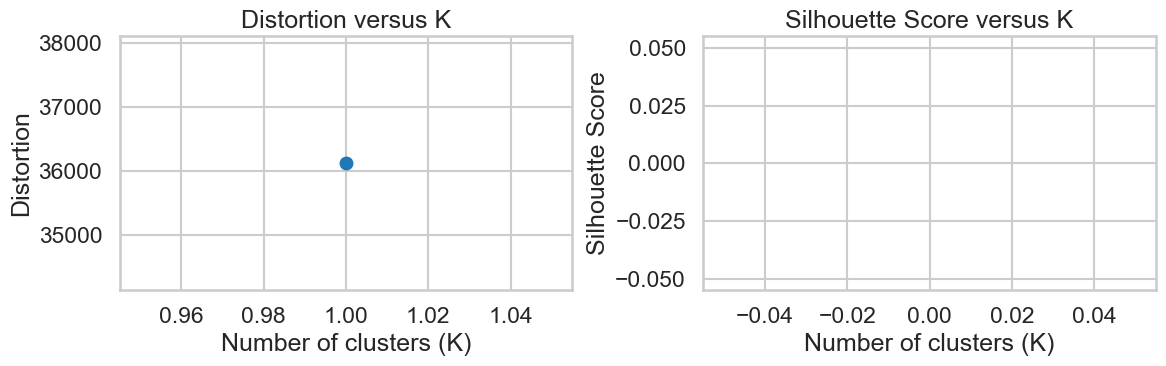

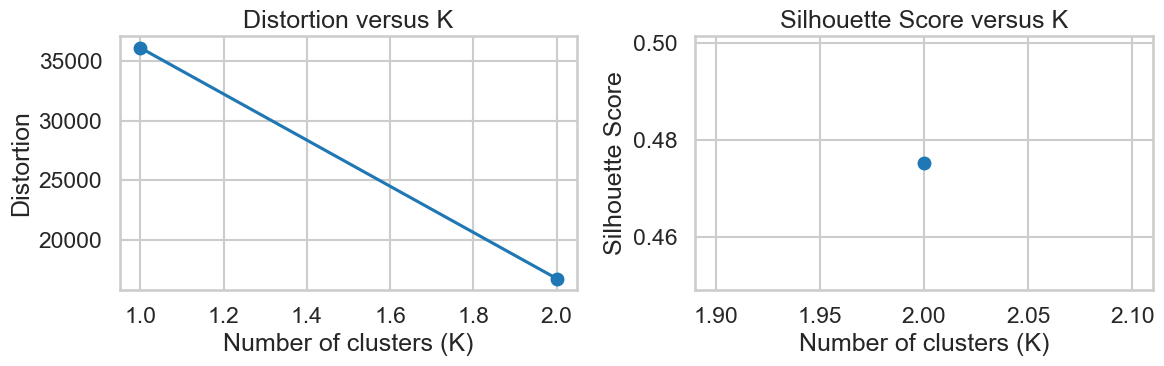

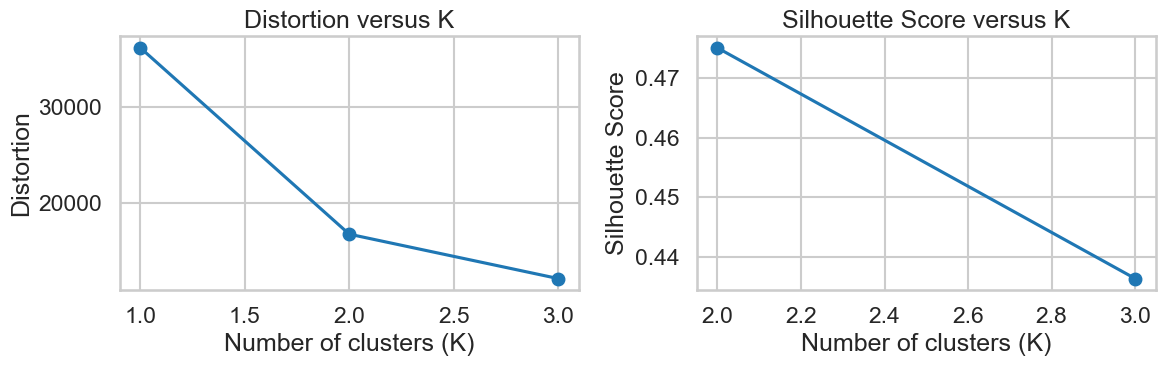

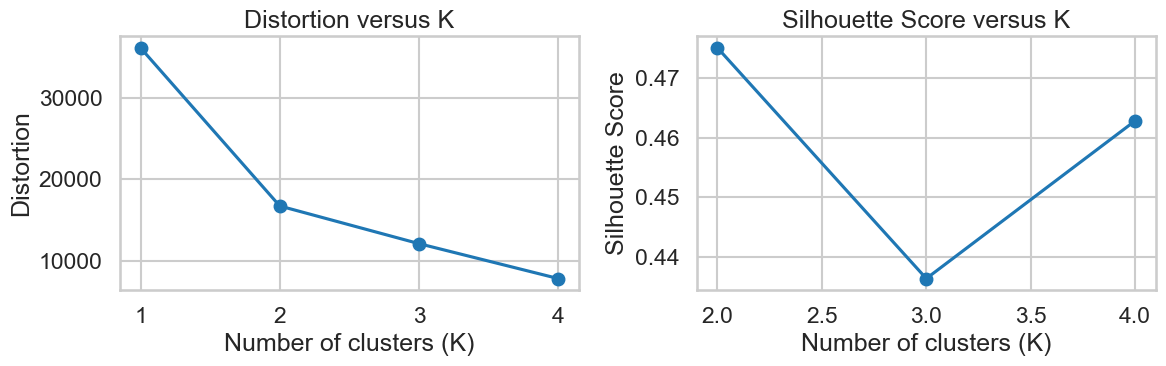

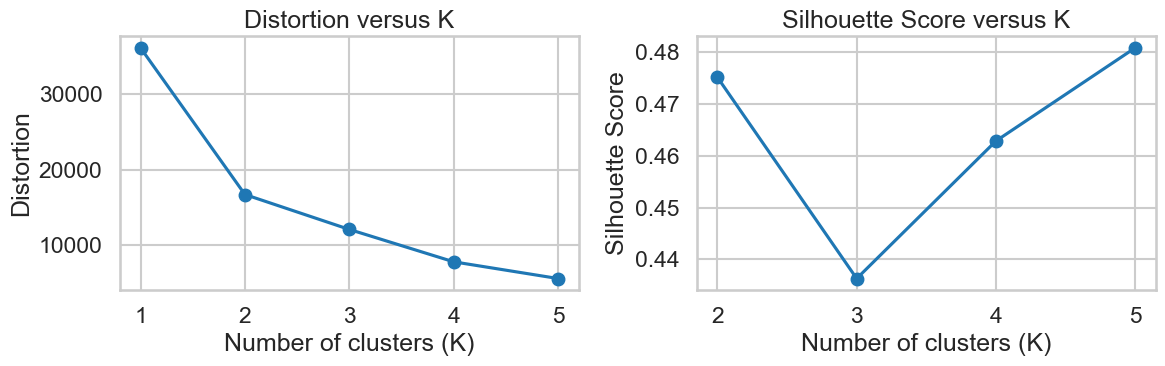

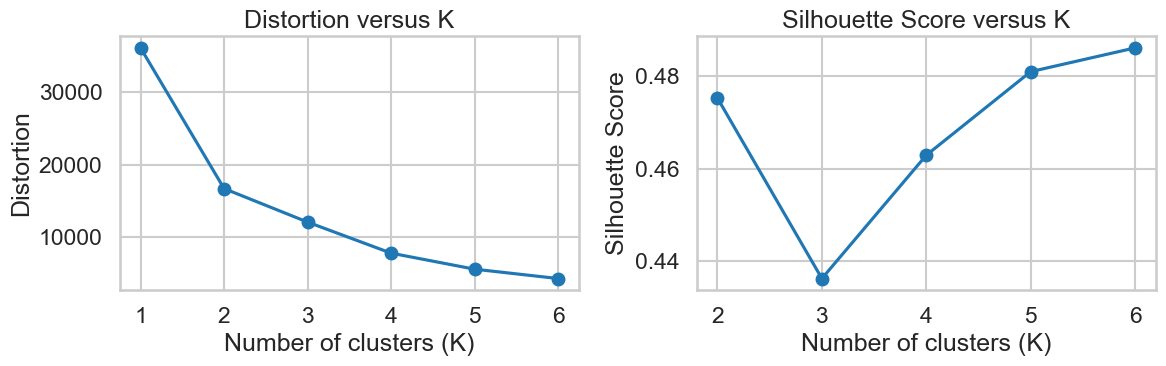

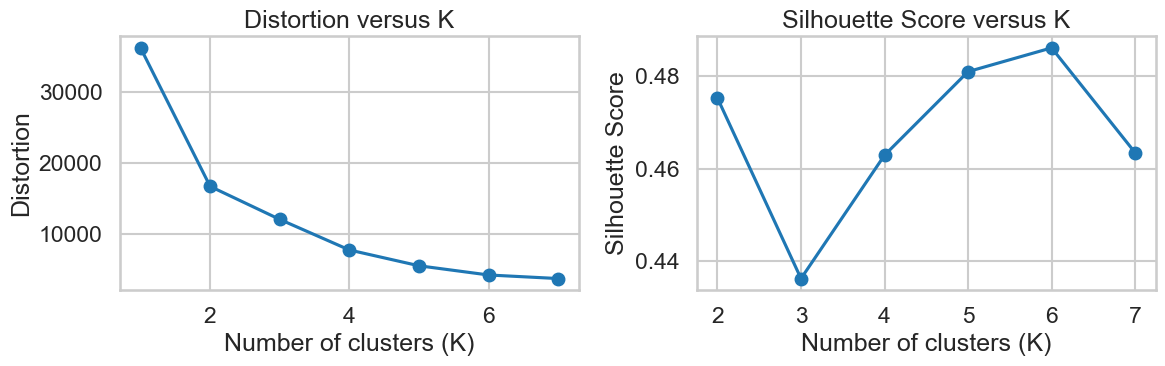

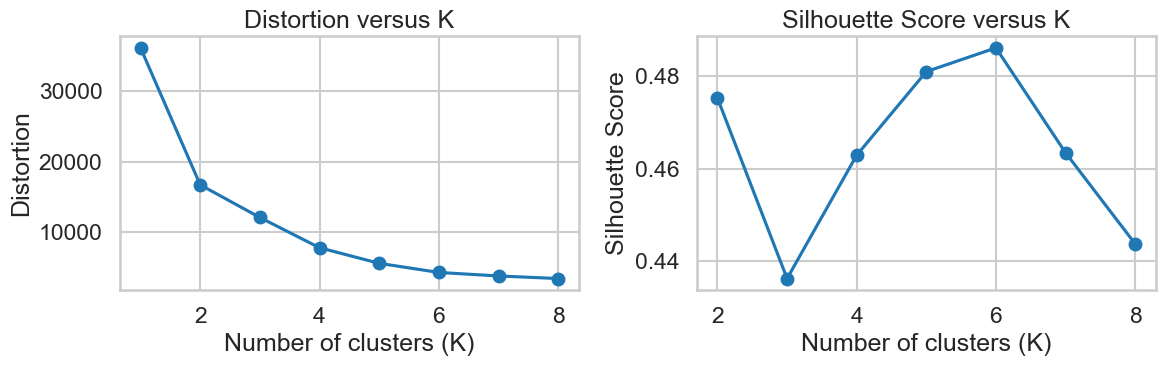

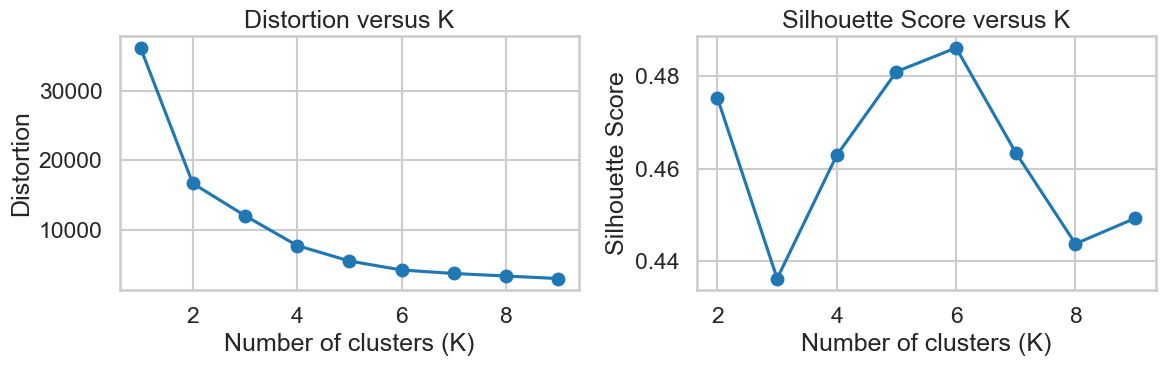

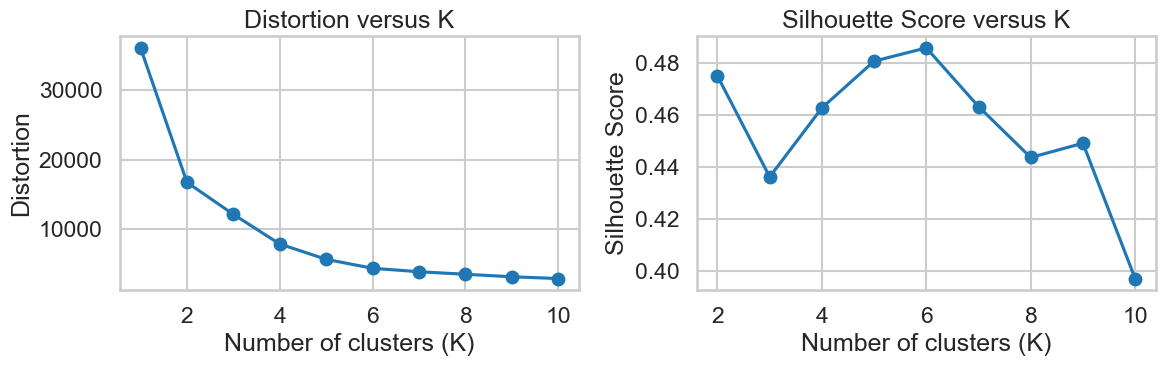

Best value of K based on silhouette score: 6


In [6]:
def kmeans_clustering(X, max_k):
    distortions = []
    silhouette_scores = []

    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        distortions.append(kmeans.inertia_)  # Distortion function
        if k > 1:  # Silhouette score requires at least 2 clusters
            silhouette_scores.append(silhouette_score(X, kmeans.labels_))
        else:
            silhouette_scores.append(None)

        plt.figure(figsize=(12, 4))

        plt.subplot(1, 2, 1)
        plt.plot(range(1, k + 1), distortions, marker='o')
        plt.xlabel('Number of clusters (K)')
        plt.ylabel('Distortion')
        plt.title('Distortion versus K')

        plt.subplot(1, 2, 2)
        plt.plot(range(2, k + 1), silhouette_scores[1:], marker='o')
        plt.xlabel('Number of clusters (K)')
        plt.ylabel('Silhouette Score')
        plt.title('Silhouette Score versus K')

        plt.tight_layout()
        plt.show()

    # Filter out None values and find the index of the maximum silhouette score
    best_k = silhouette_scores.index(max(filter(None, silhouette_scores))) + 1
    print("Best value of K based on silhouette score:", best_k)

    return best_k

# Clustering with K-means
max_k = 10  # Maximum value of K to try
best_k = kmeans_clustering(Multi_blob_Data, max_k)



### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

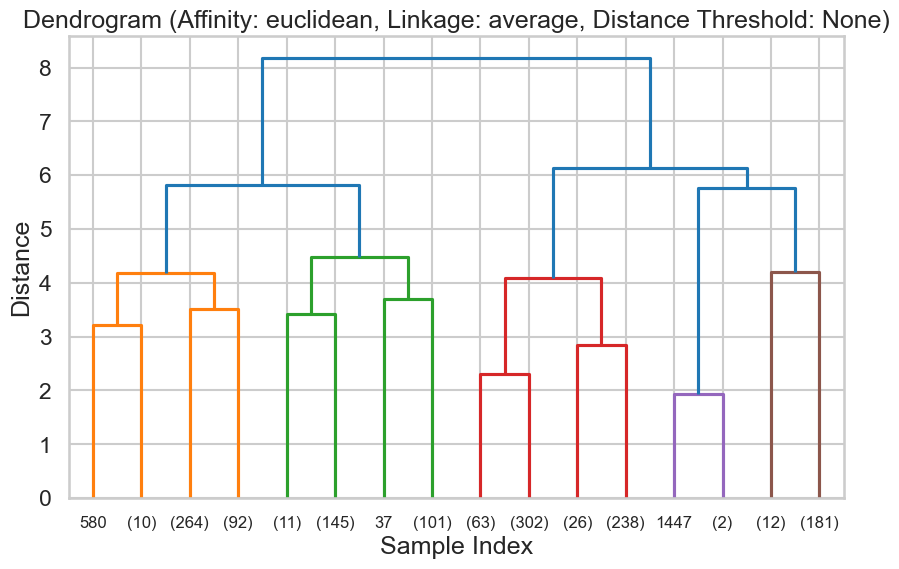

Silhouette Score (Affinity: euclidean, Linkage: average, Distance Threshold: None): 0.41478815574933364


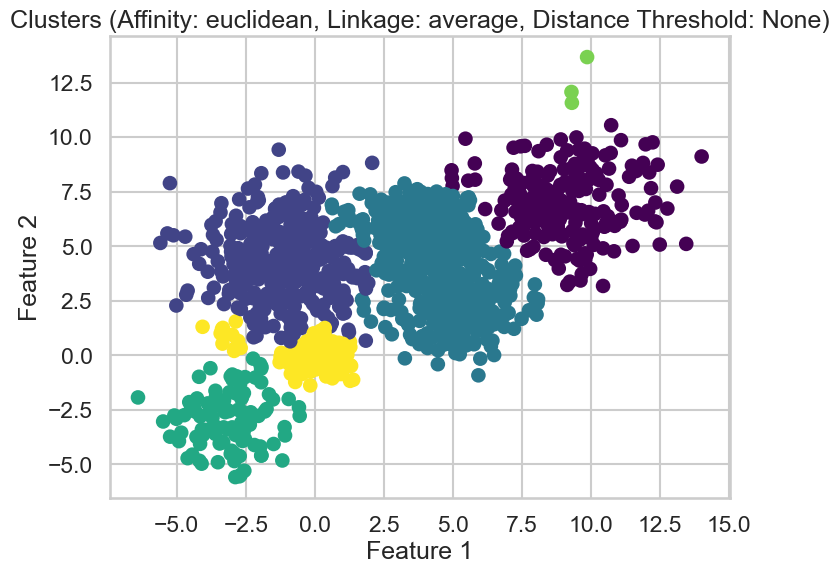

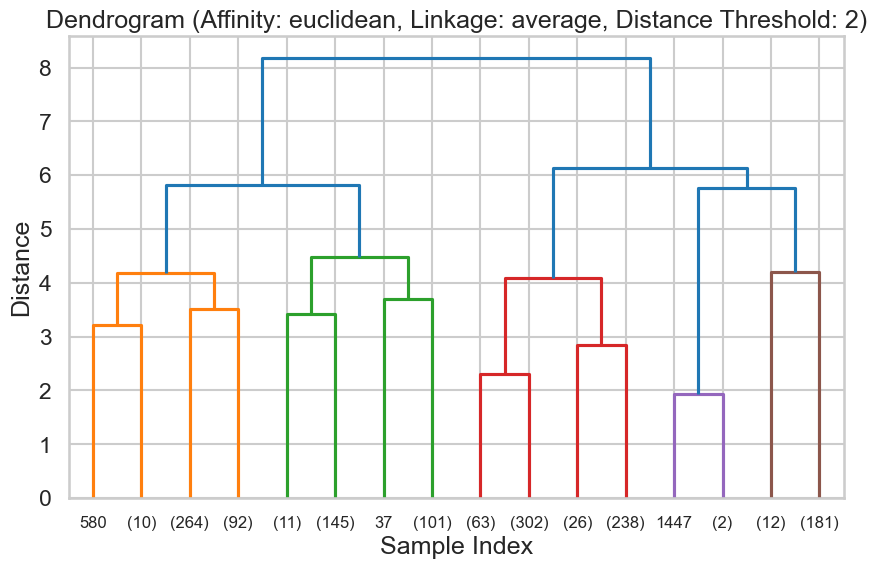

Silhouette Score (Affinity: euclidean, Linkage: average, Distance Threshold: 2): 0.3155710172095083


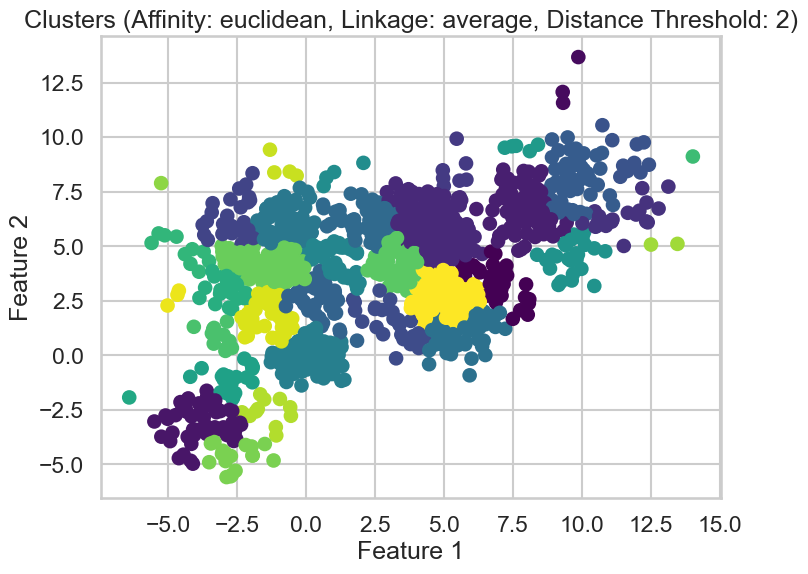

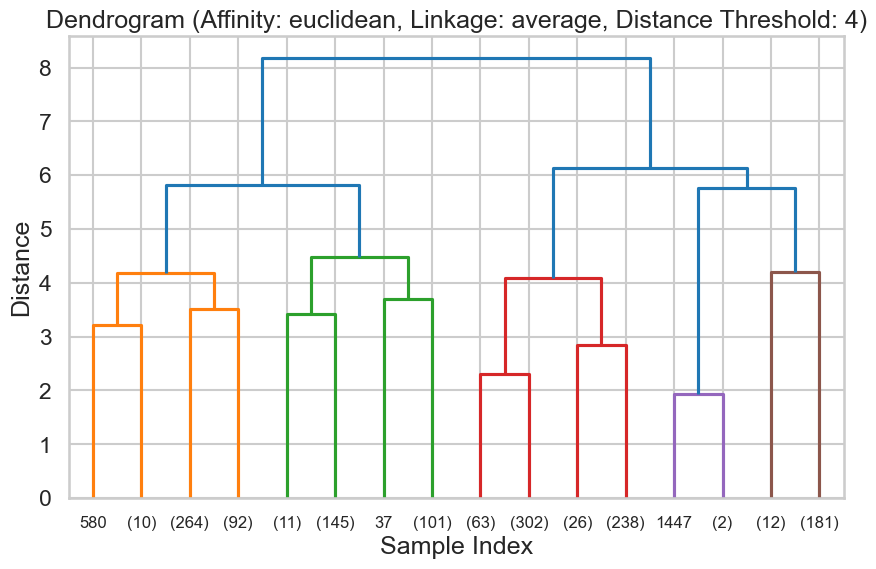

Silhouette Score (Affinity: euclidean, Linkage: average, Distance Threshold: 4): 0.37378418096239385


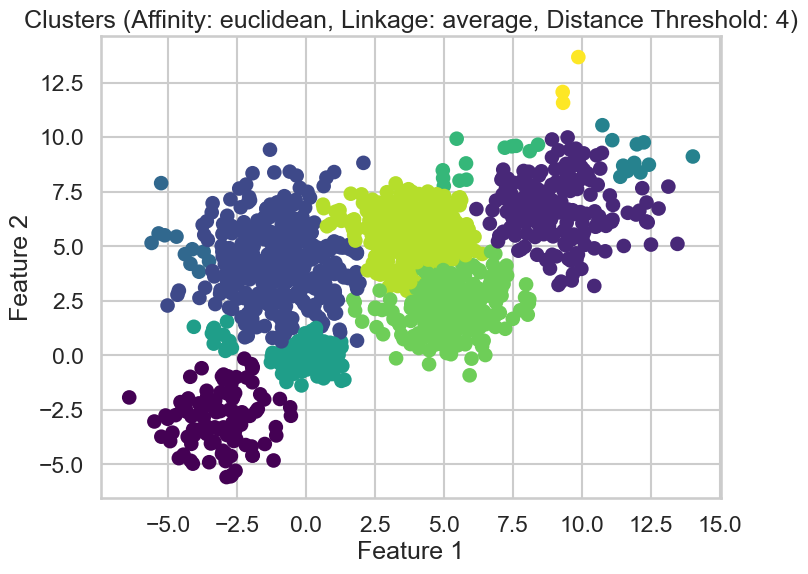

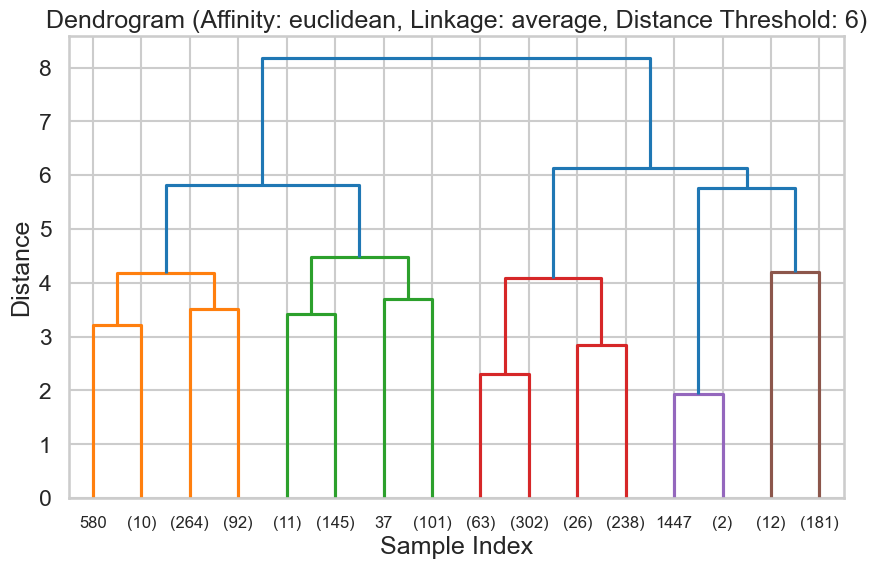

Silhouette Score (Affinity: euclidean, Linkage: average, Distance Threshold: 6): 0.4307906732655957


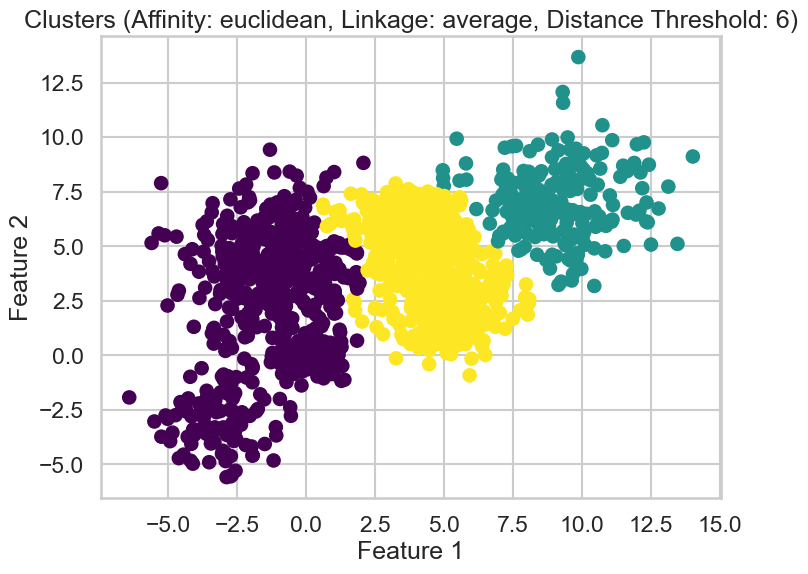

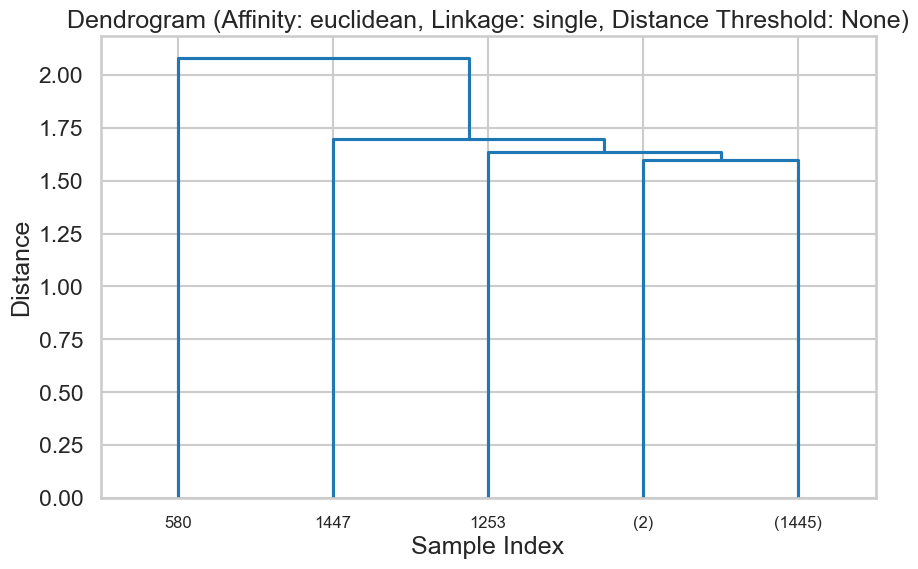

Silhouette Score (Affinity: euclidean, Linkage: single, Distance Threshold: None): 0.08705564851389591


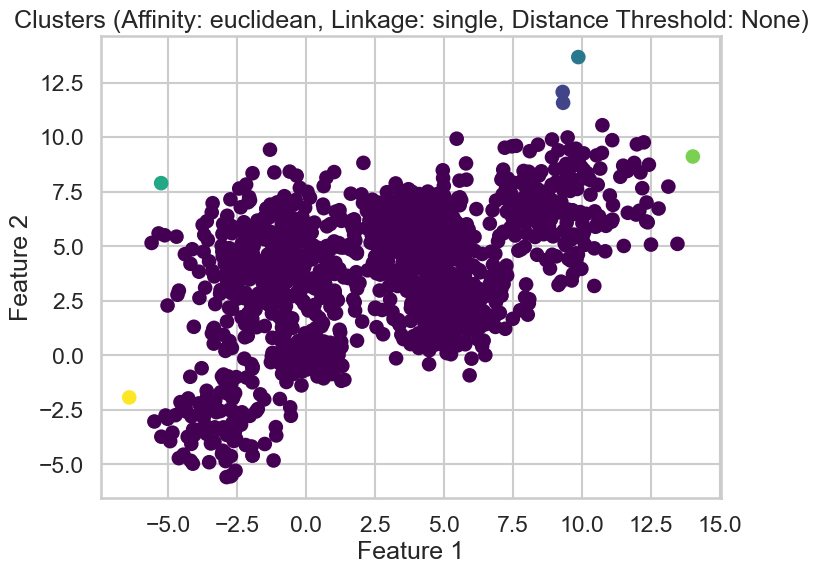

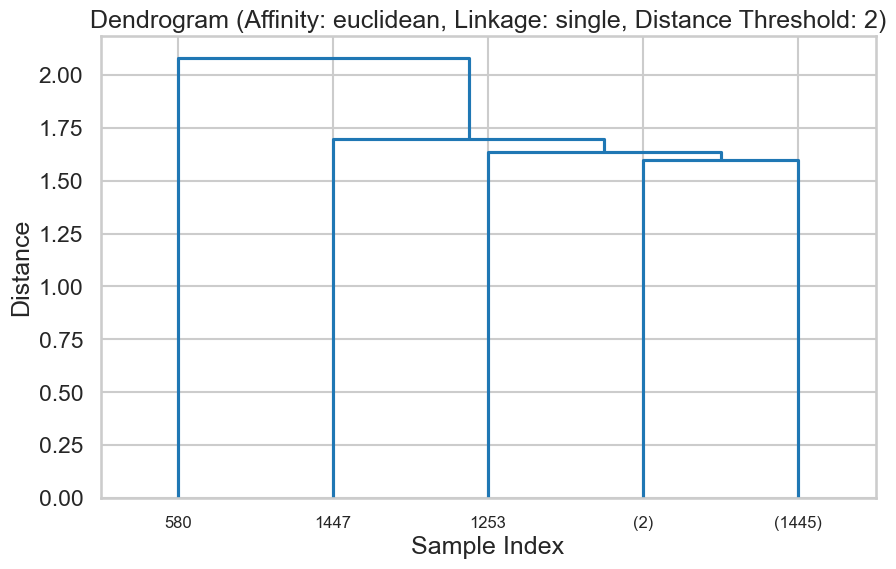

Silhouette Score (Affinity: euclidean, Linkage: single, Distance Threshold: 2): 0.3218066204847175


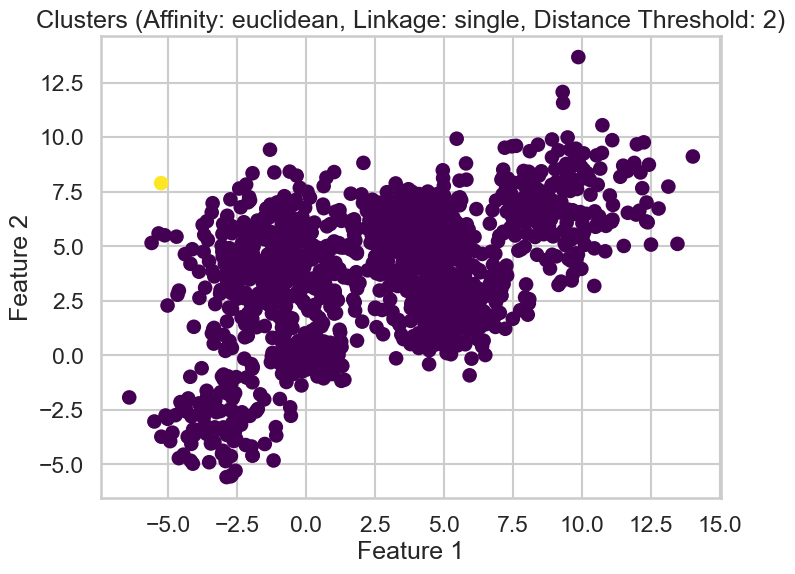

Skipping silhouette score calculation for parameters: Affinity=euclidean, Linkage=single, Distance Threshold=4
Skipping silhouette score calculation for parameters: Affinity=euclidean, Linkage=single, Distance Threshold=6


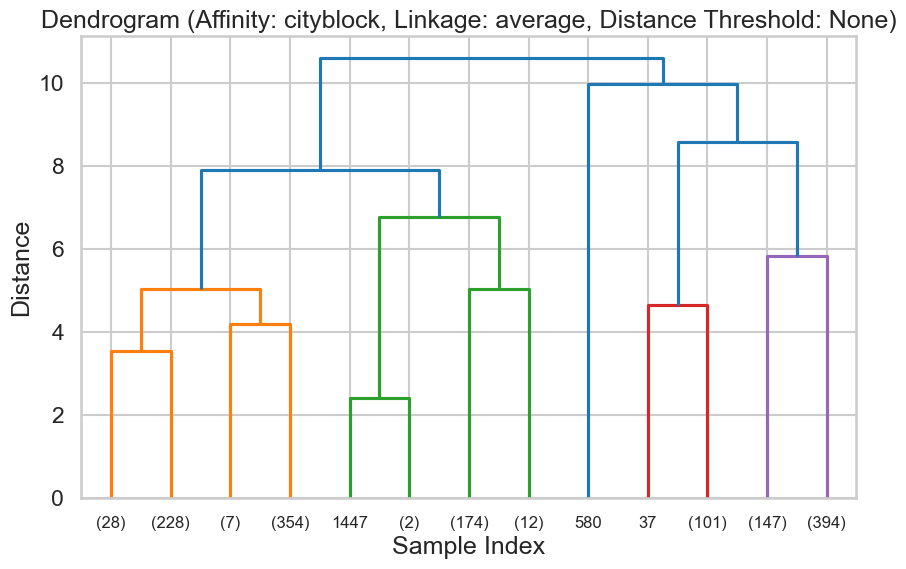

Silhouette Score (Affinity: cityblock, Linkage: average, Distance Threshold: None): 0.38029768112070367


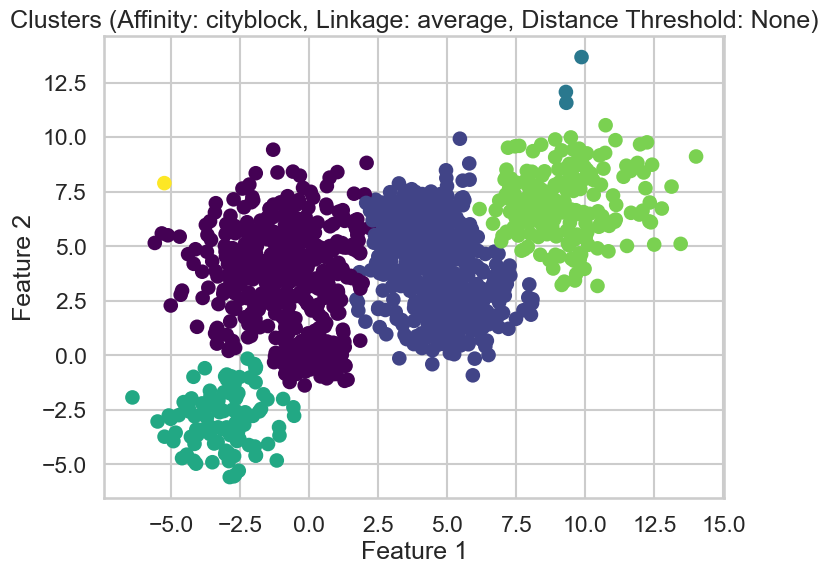

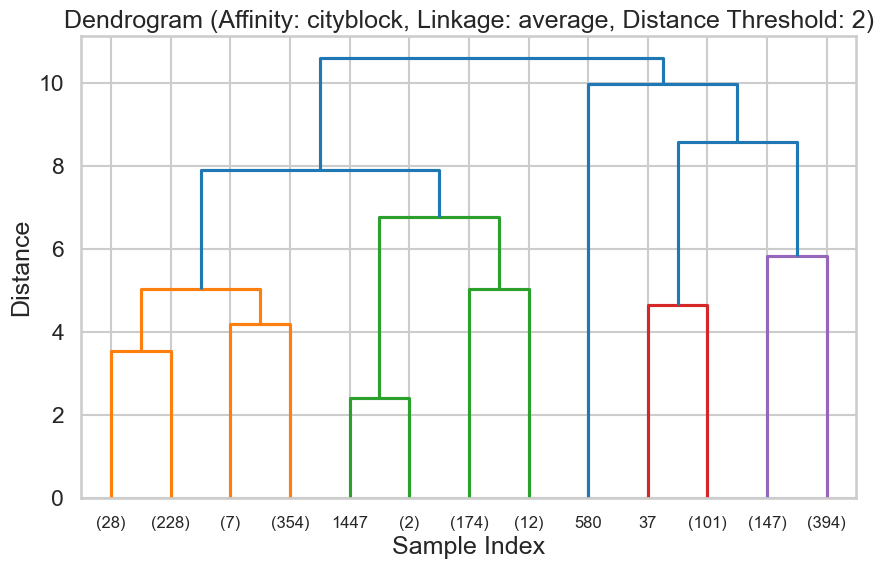

Silhouette Score (Affinity: cityblock, Linkage: average, Distance Threshold: 2): 0.2781468651903617


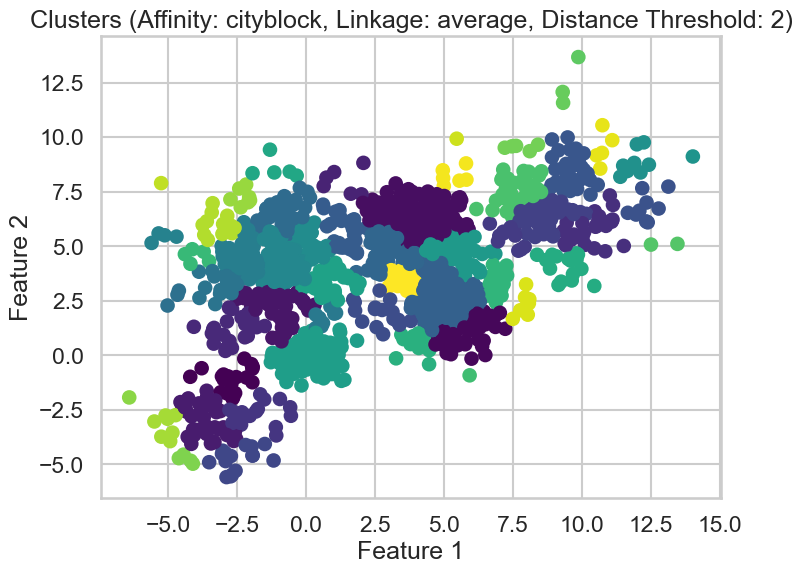

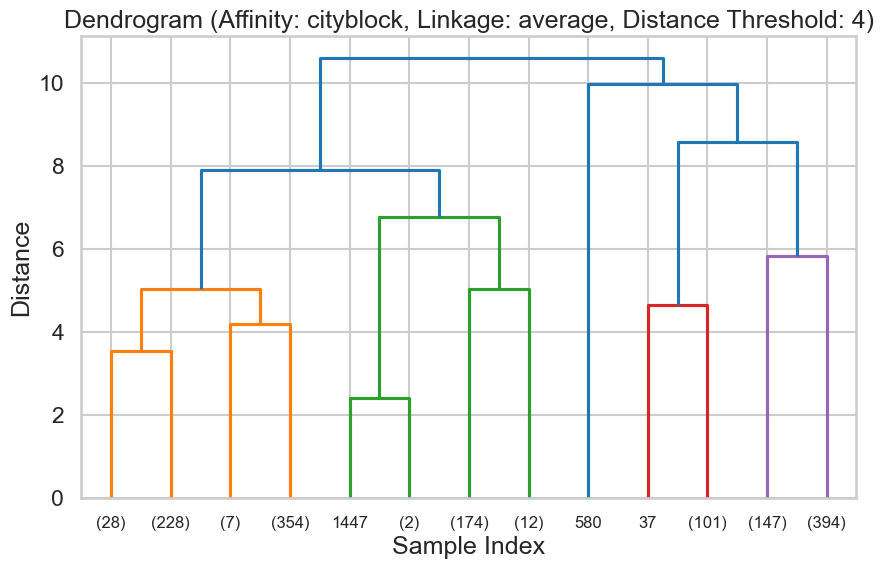

Silhouette Score (Affinity: cityblock, Linkage: average, Distance Threshold: 4): 0.3331978782243237


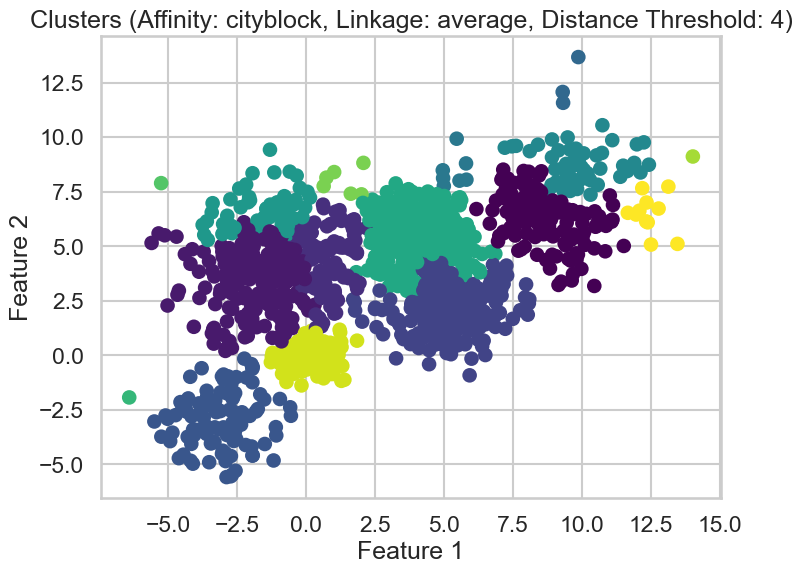

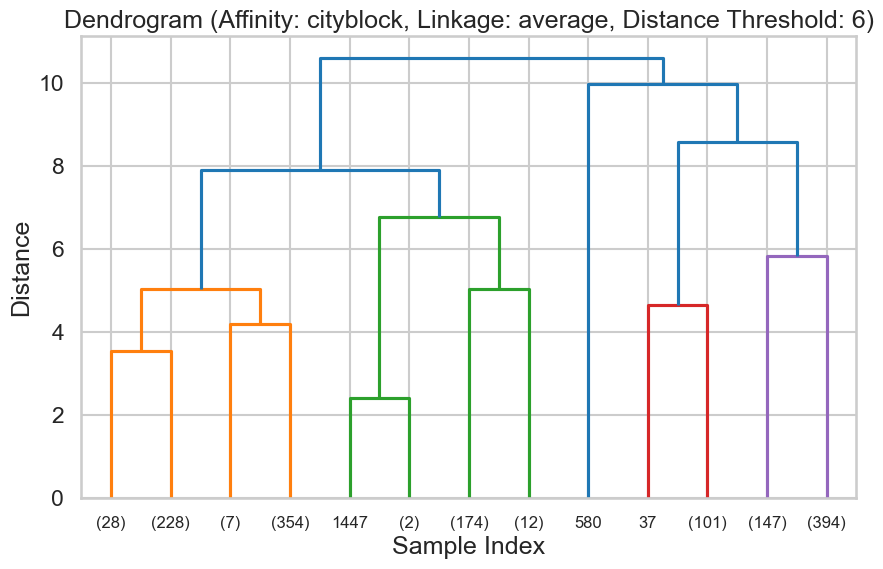

Silhouette Score (Affinity: cityblock, Linkage: average, Distance Threshold: 6): 0.38029768112070367


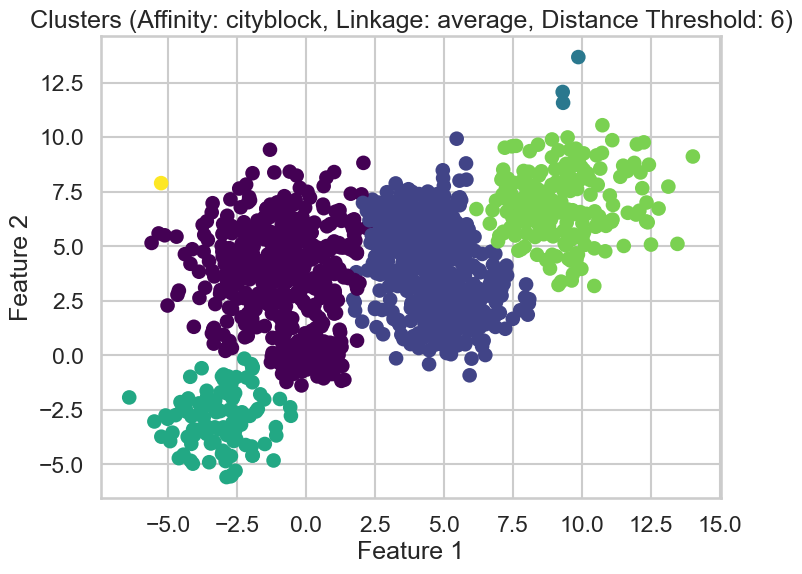

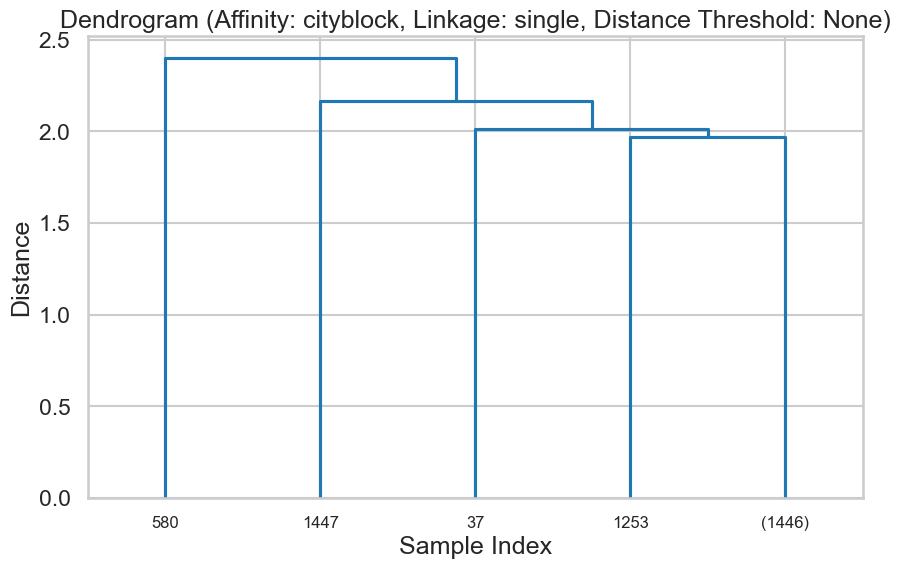

Silhouette Score (Affinity: cityblock, Linkage: single, Distance Threshold: None): 0.08705564851389591


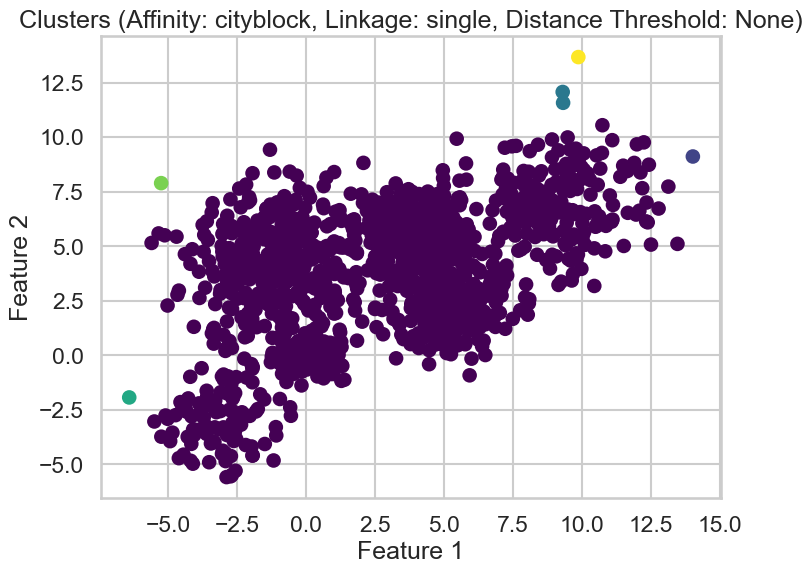

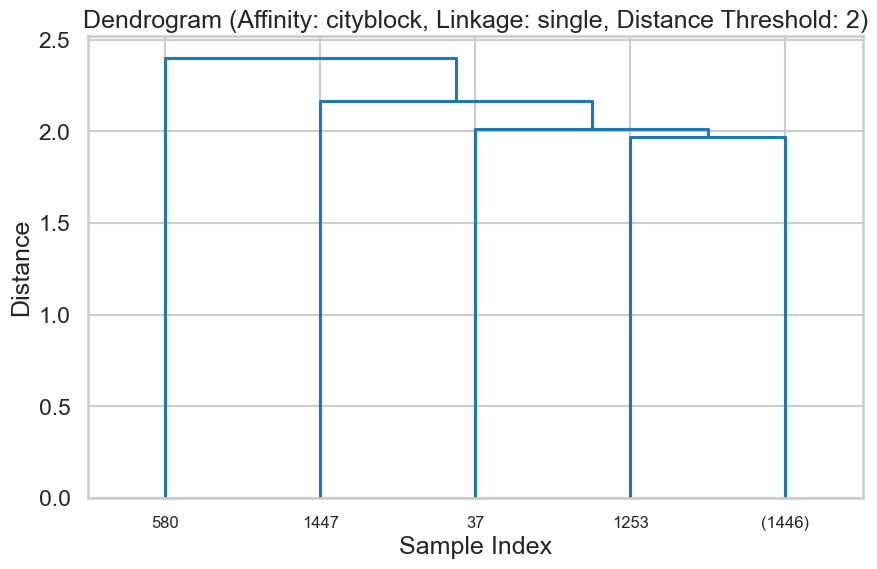

Silhouette Score (Affinity: cityblock, Linkage: single, Distance Threshold: 2): 0.14871638406533946


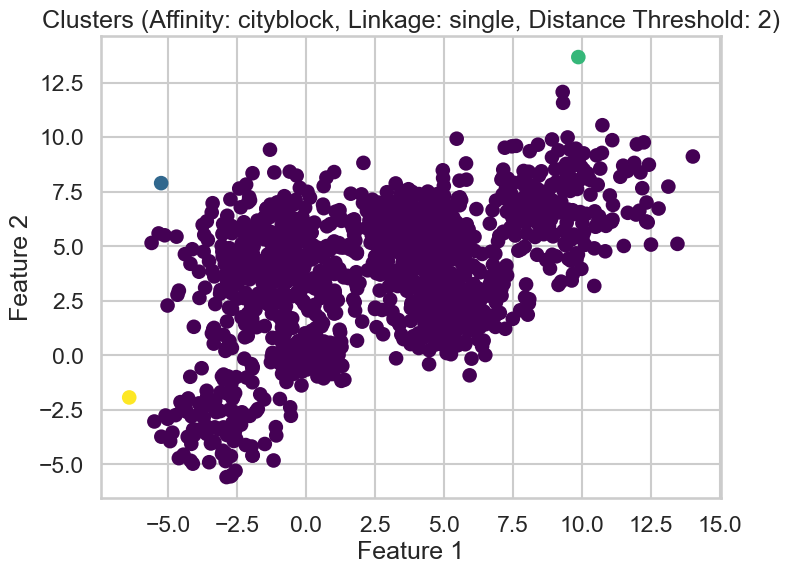

Skipping silhouette score calculation for parameters: Affinity=cityblock, Linkage=single, Distance Threshold=4
Skipping silhouette score calculation for parameters: Affinity=cityblock, Linkage=single, Distance Threshold=6


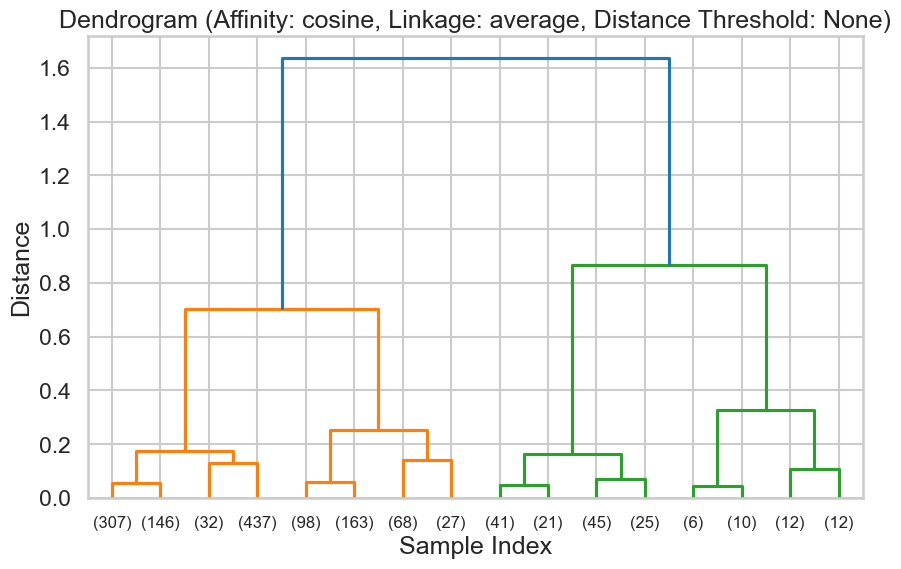

Silhouette Score (Affinity: cosine, Linkage: average, Distance Threshold: None): 0.2035575393889621


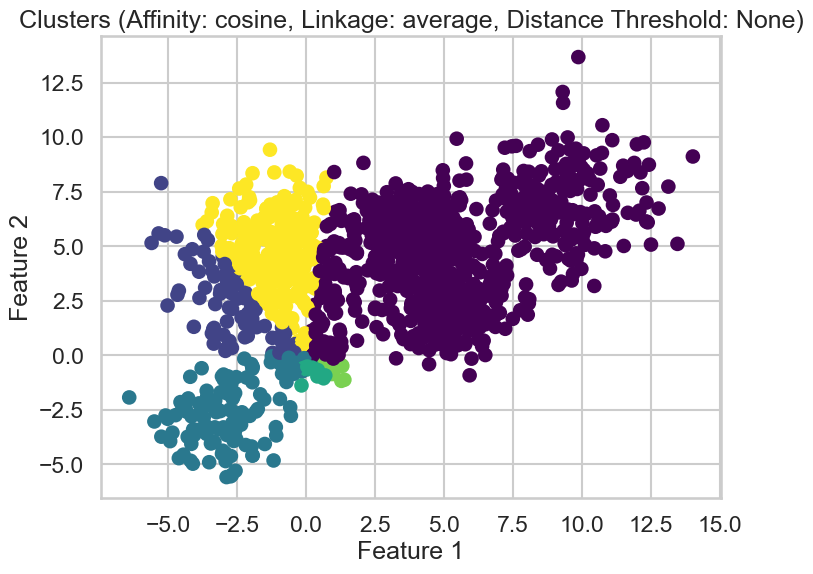

Skipping silhouette score calculation for parameters: Affinity=cosine, Linkage=average, Distance Threshold=2
Skipping silhouette score calculation for parameters: Affinity=cosine, Linkage=average, Distance Threshold=4
Skipping silhouette score calculation for parameters: Affinity=cosine, Linkage=average, Distance Threshold=6


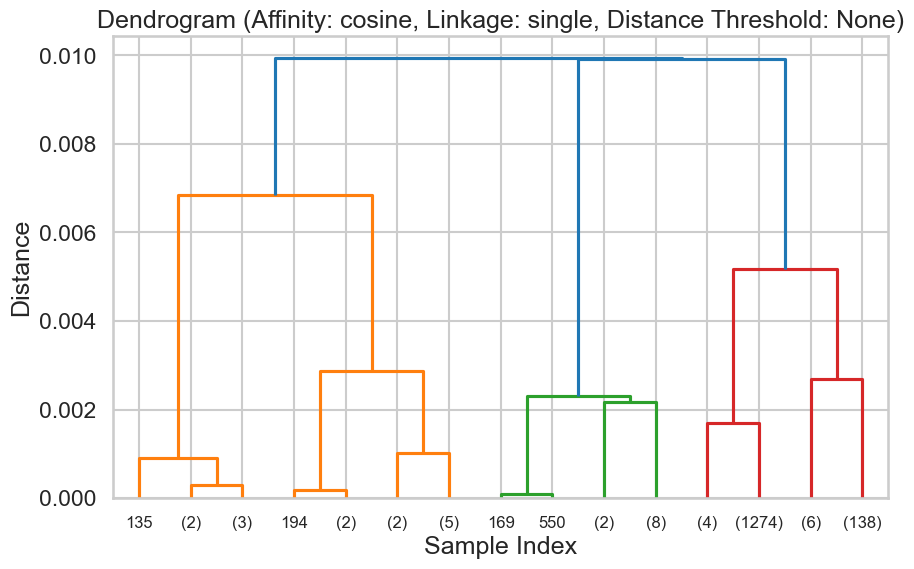

Silhouette Score (Affinity: cosine, Linkage: single, Distance Threshold: None): 0.07162243486315635


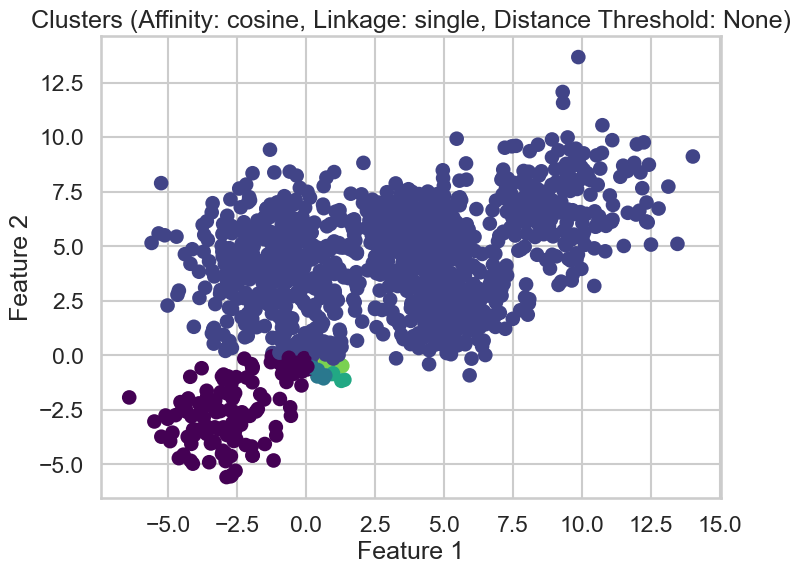

Skipping silhouette score calculation for parameters: Affinity=cosine, Linkage=single, Distance Threshold=2
Skipping silhouette score calculation for parameters: Affinity=cosine, Linkage=single, Distance Threshold=4
Skipping silhouette score calculation for parameters: Affinity=cosine, Linkage=single, Distance Threshold=6
Best parameters based on silhouette score:
{'affinity': 'euclidean', 'linkage': 'average', 'distance_threshold': 6}
Best silhouette score: 0.4307906732655957


In [7]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import numpy as np

from scipy.cluster.hierarchy import linkage


from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

def hierarchical_clustering(X, affinities, linkages, distance_thresholds):
    best_silhouette_score = -1
    best_params = {}

    for affinity in affinities:
        for linkage_method in linkages:
            for distance_threshold in distance_thresholds:
                # Perform hierarchical clustering
                if distance_threshold is not None:
                    clustering = AgglomerativeClustering(n_clusters=None, affinity=affinity, linkage=linkage_method, distance_threshold=distance_threshold)
                else:
                    clustering = AgglomerativeClustering(n_clusters=best_k, affinity=affinity, linkage=linkage_method)
                clustering.fit(X)
                labels = clustering.labels_

                # Check if there's only one cluster
                unique_labels = len(set(labels))
                if unique_labels < 2:
                    print(f"Skipping silhouette score calculation for parameters: Affinity={affinity}, Linkage={linkage_method}, Distance Threshold={distance_threshold}")
                    continue

                # Compute linkage matrix
                Z = linkage(X, method=linkage_method, metric=affinity)

                # Plot dendrogram
                plt.figure(figsize=(10, 6))
                dendrogram(Z, truncate_mode='level', p=3)
                plt.title(f'Dendrogram (Affinity: {affinity}, Linkage: {linkage_method}, Distance Threshold: {distance_threshold})')
                plt.xlabel('Sample Index')
                plt.ylabel('Distance')
                plt.show()

                # Calculate silhouette score
                silhouette = silhouette_score(X, labels)
                print(f'Silhouette Score (Affinity: {affinity}, Linkage: {linkage_method}, Distance Threshold: {distance_threshold}): {silhouette}')

                # Update best silhouette score and parameters
                if silhouette > best_silhouette_score:
                    best_silhouette_score = silhouette
                    best_params['affinity'] = affinity
                    best_params['linkage'] = linkage_method
                    best_params['distance_threshold'] = distance_threshold

                # Display resulting clusters
                plt.figure(figsize=(8, 6))
                plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
                plt.title(f'Clusters (Affinity: {affinity}, Linkage: {linkage_method}, Distance Threshold: {distance_threshold})')
                plt.xlabel('Feature 1')
                plt.ylabel('Feature 2')
                plt.show()

    print("Best parameters based on silhouette score:")
    print(best_params)
    print("Best silhouette score:", best_silhouette_score)

    return best_params, best_silhouette_score

# Define parameters to try
affinities = ['euclidean', 'cityblock', 'cosine']
linkages = ['average', 'single']
distance_thresholds = [None, 2, 4, 6]  # Different distance thresholds to try

# Perform hierarchical clustering
best_params, best_silhouette_score = hierarchical_clustering(Multi_blob_Data, affinities, linkages, distance_thresholds)







### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

Skipping silhouette score calculation for parameters: EPS=0.1, Min_samples=7
Skipping silhouette score calculation for parameters: EPS=0.1, Min_samples=8
Skipping silhouette score calculation for parameters: EPS=0.1, Min_samples=9
Skipping silhouette score calculation for parameters: EPS=0.1, Min_samples=10
Skipping silhouette score calculation for parameters: EPS=0.1, Min_samples=11
Skipping silhouette score calculation for parameters: EPS=0.1, Min_samples=12
Skipping silhouette score calculation for parameters: EPS=0.1, Min_samples=13
Skipping silhouette score calculation for parameters: EPS=0.1, Min_samples=14
Skipping silhouette score calculation for parameters: EPS=0.1, Min_samples=15
Skipping silhouette score calculation for parameters: EPS=0.1, Min_samples=16
Skipping silhouette score calculation for parameters: EPS=0.1, Min_samples=17
Skipping silhouette score calculation for parameters: EPS=0.1, Min_samples=18
Skipping silhouette score calculation for parameters: EPS=0.1, Min_

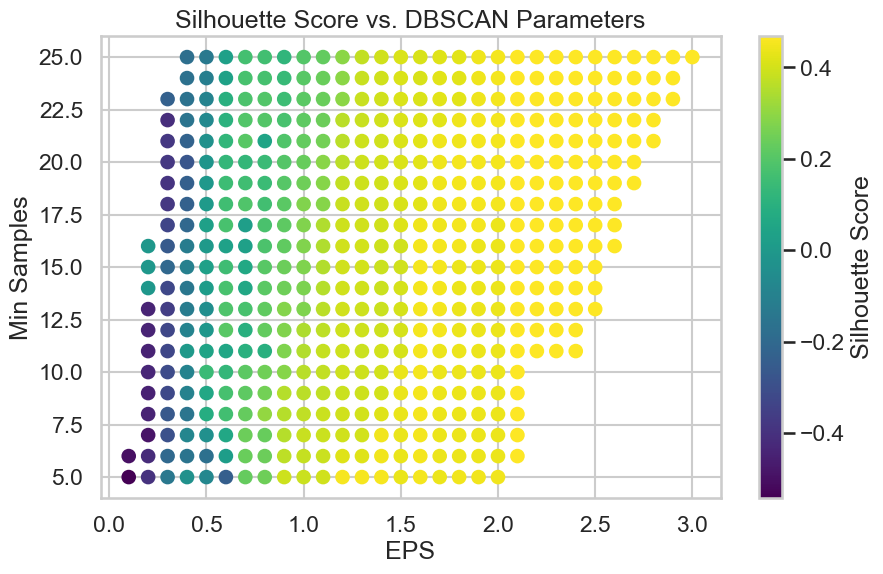

Best parameters based on silhouette score:
{'eps': 2.0999999999999996, 'min_samples': 6}
Best silhouette score: 0.4685207355522043


In [8]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

def dbscan_clustering(X, eps_values, min_samples_values):
    best_silhouette_score = -1
    best_params = {}
    silhouette_scores = []

    for eps in eps_values:
        for min_samples in min_samples_values:
            # Perform DBSCAN clustering
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            dbscan.fit(X)
            labels = dbscan.labels_

            # Check if there's only one cluster
            unique_labels = len(set(labels))
            if unique_labels < 2:
                print(f"Skipping silhouette score calculation for parameters: EPS={eps}, Min_samples={min_samples}")
                continue

            # Calculate silhouette score
            silhouette = silhouette_score(X, labels)
            silhouette_scores.append((eps, min_samples, silhouette))

            # Update best silhouette score and parameters
            if silhouette > best_silhouette_score:
                best_silhouette_score = silhouette
                best_params['eps'] = eps
                best_params['min_samples'] = min_samples

    # Plot silhouette scores versus variations in EPS and min_samples
    eps_values, min_samples_values, silhouette_scores = zip(*silhouette_scores)
    plt.figure(figsize=(10, 6))
    plt.scatter(eps_values, min_samples_values, c=silhouette_scores, cmap='viridis')
    plt.colorbar(label='Silhouette Score')
    plt.xlabel('EPS')
    plt.ylabel('Min Samples')
    plt.title('Silhouette Score vs. DBSCAN Parameters')
    plt.show()

    print("Best parameters based on silhouette score:")
    print(best_params)
    print("Best silhouette score:", best_silhouette_score)

    return best_params, best_silhouette_score

# Define parameter ranges
eps_values = np.linspace(0.1, 3, 30)
min_samples_values = np.arange(5, 26)

# Perform DBSCAN clustering
best_params_dbscan, best_silhouette_score_dbscan = dbscan_clustering(Multi_blob_Data, eps_values, min_samples_values)


### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

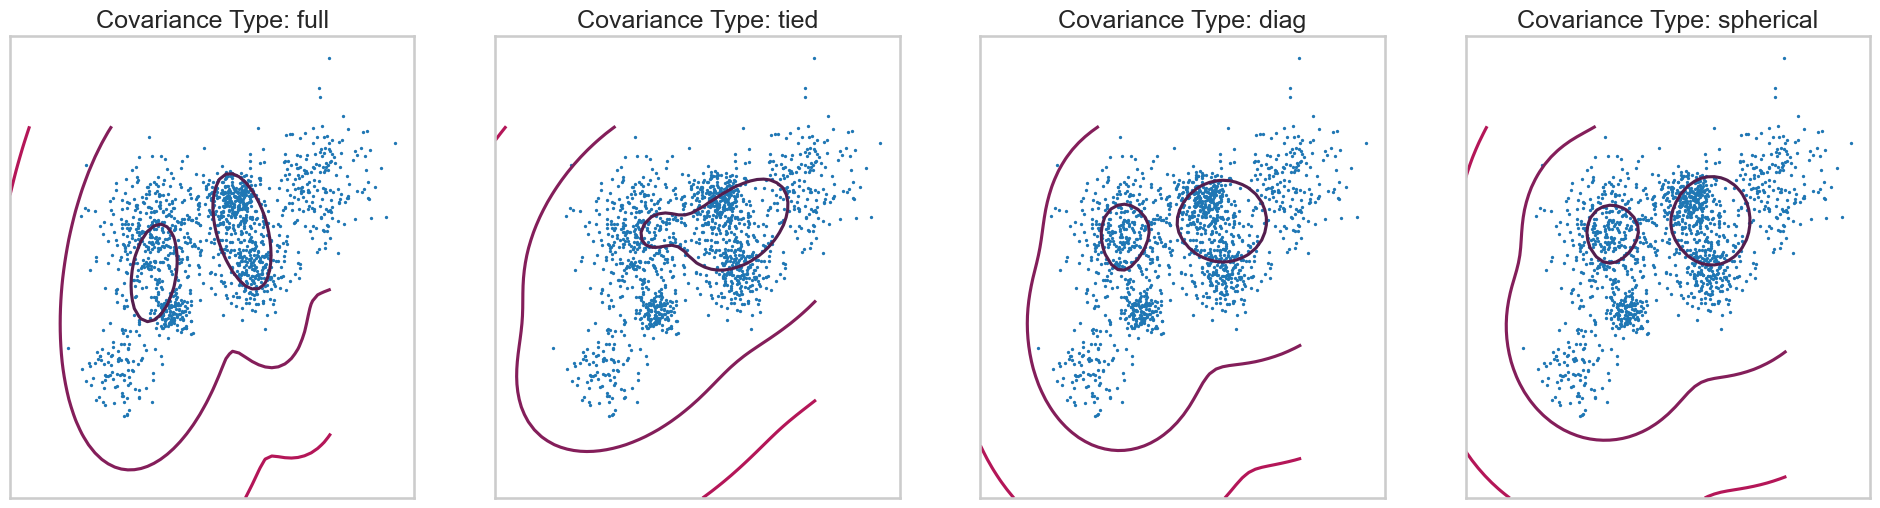

In [9]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

def gmm_clustering(X, covariance_types):
    plt.figure(figsize=(len(covariance_types) * 6, 6))
    for i, cov_type in enumerate(covariance_types, start=1):
        # Fit Gaussian Mixture Model
        gmm = GaussianMixture(n_components=3, covariance_type=cov_type)
        gmm.fit(X)
        
        # Plot resulting distribution
        plt.subplot(1, len(covariance_types), i)
        x = np.linspace(-10., 10.)
        y = np.linspace(-10., 10.)
        X_, Y_ = np.meshgrid(x, y)
        XX = np.array([X_.ravel(), Y_.ravel()]).T
        Z = -gmm.score_samples(XX)
        Z = Z.reshape(X_.shape)
        
        plt.contour(X_, Y_, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                     levels=np.logspace(0, 3, 10))
        plt.scatter(X[:, 0], X[:, 1], s=0.8)
        plt.title(f'Covariance Type: {cov_type}')
        plt.xticks(())
        plt.yticks(())
    plt.show()

# Define covariance types
covariance_types = ['full', 'tied', 'diag', 'spherical']

# Perform GMM clustering
gmm_clustering(Multi_blob_Data, covariance_types)


## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [16]:
# from sklearn.datasets import load_iris
# iris_data = load_iris()
# iris_data.target[[10, 25, 50]]
# #array([0, 0, 1])
# list(iris_data.target_names)
# ['setosa', 'versicolor', 'virginica']

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Define function to perform clustering
def perform_clustering(X):
    # KMeans
    kmeans = KMeans(n_clusters=3, random_state=42)
    kmeans_labels = kmeans.fit_predict(X)
    kmeans_silhouette = silhouette_score(X, kmeans_labels)

    # Agglomerative Clustering
    agg_clustering = AgglomerativeClustering(n_clusters=3)
    agg_labels = agg_clustering.fit_predict(X)
    agg_silhouette = silhouette_score(X, agg_labels)

    # DBScan
    dbscan = DBSCAN(eps=0.5, min_samples=5)
    dbscan_labels = dbscan.fit_predict(X)
    unique_dbscan_labels = np.unique(dbscan_labels)
    if -1 in unique_dbscan_labels:
        unique_dbscan_labels = unique_dbscan_labels[1:]  # Exclude noise points (-1)
    dbscan_silhouette = silhouette_score(X, dbscan_labels)

    # Gaussian Mixture
    gmm = GaussianMixture(n_components=3)
    gmm_labels = gmm.fit_predict(X)
    gmm_silhouette = silhouette_score(X, gmm_labels)

    return (kmeans_labels, kmeans_silhouette), (agg_labels, agg_silhouette), \
           (dbscan_labels, dbscan_silhouette), (gmm_labels, gmm_silhouette)

# Step 1: Load the Iris dataset
iris_data = load_iris()
X = iris_data.data

# Step 2: Apply PCA to reduce the dimensionality of the feature space
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Step 3: Perform clustering on the PCA-transformed data
kmeans_labels_pca, agg_labels_pca, dbscan_labels_pca, gmm_labels_pca = perform_clustering(X_pca)

# Step 4: Normalize the data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Step 5: Apply PCA to the normalized data
X_normalized_pca = pca.fit_transform(X_normalized)

# Step 6: Perform clustering on the normalized, PCA-transformed data
kmeans_labels_norm_pca, agg_labels_norm_pca, dbscan_labels_norm_pca, gmm_labels_norm_pca = perform_clustering(X_normalized_pca)

# Step 7: Compare the clustering results
print("Clustering Results on Normalized, PCA-transformed Data:")
print("KMeans Silhouette Score:", kmeans_labels_norm_pca[1])
print("Agglomerative Clustering Silhouette Score:", agg_labels_norm_pca[1])
print("DBScan Silhouette Score:", dbscan_labels_norm_pca[1])
print("Gaussian Mixture Silhouette Score:", gmm_labels_norm_pca[1])




Clustering Results on Normalized, PCA-transformed Data:
KMeans Silhouette Score: 0.5091683341538228
Agglomerative Clustering Silhouette Score: 0.511059598876619
DBScan Silhouette Score: 0.5245307474143991
Gaussian Mixture Silhouette Score: 0.48902970133785423


* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

## Customer dataset
Repeat all the above on the customer data set 

In [25]:
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Customer data.csv')

# Display the first few rows of the dataset
print(df.head())

# Preprocess the data (if necessary)
# For simplicity, let's assume that preprocessing steps like handling missing values and categorical encoding are not required

# Step 1: Extract features
X = df.drop(columns=['ID'])

# Step 2: Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Step 3: Perform clustering approaches on the PCA-transformed data
def perform_clustering(X):
    # KMeans
    kmeans = KMeans(n_clusters=3, random_state=42)
    kmeans_labels = kmeans.fit_predict(X)
    kmeans_silhouette = silhouette_score(X, kmeans_labels)

    # Agglomerative Clustering
    agg_clustering = AgglomerativeClustering(n_clusters=3)
    agg_labels = agg_clustering.fit_predict(X)
    agg_silhouette = silhouette_score(X, agg_labels)

    # DBScan
    dbscan = DBSCAN(eps=0.5, min_samples=5)
    dbscan_labels = dbscan.fit_predict(X)
    unique_dbscan_labels = np.unique(dbscan_labels)
    if len(unique_dbscan_labels) > 1:
        if -1 in unique_dbscan_labels:
            unique_dbscan_labels = unique_dbscan_labels[1:]  # Exclude noise points (-1)
        dbscan_silhouette = silhouette_score(X, dbscan_labels)
    else:
        dbscan_silhouette = -1  # No valid clusters

    # Gaussian Mixture
    gmm = GaussianMixture(n_components=3)
    gmm_labels = gmm.fit_predict(X)
    gmm_silhouette = silhouette_score(X, gmm_labels)

    return (kmeans_labels, kmeans_silhouette), (agg_labels, agg_silhouette), \
           (dbscan_labels, dbscan_silhouette), (gmm_labels, gmm_silhouette)

# Step 4: Perform clustering on the PCA-transformed data
kmeans_labels_pca, agg_labels_pca, dbscan_labels_pca, gmm_labels_pca = perform_clustering(X_pca)

# Step 5: Visualize the clustering results
# (You can use visualization techniques similar to the ones used in previous examples)

# Step 6: Compare the clustering results
print("Clustering Results on PCA-transformed Data:")
print("KMeans Silhouette Score:", kmeans_labels_pca[1])
print("Agglomerative Clustering Silhouette Score:", agg_labels_pca[1])
print("DBScan Silhouette Score:", dbscan_labels_pca[1])
print("Gaussian Mixture Silhouette Score:", gmm_labels_pca[1])


          ID  Sex  Marital status  Age  Education  Income  Occupation  \
0  100000001    0               0   67          2  124670           1   
1  100000002    1               1   22          1  150773           1   
2  100000003    0               0   49          1   89210           0   
3  100000004    0               0   45          1  171565           1   
4  100000005    0               0   53          1  149031           1   

   Settlement size  
0                2  
1                2  
2                0  
3                1  
4                1  
Clustering Results on PCA-transformed Data:
KMeans Silhouette Score: 0.5116316429865526
Agglomerative Clustering Silhouette Score: 0.5285291461503798
DBScan Silhouette Score: -1
Gaussian Mixture Silhouette Score: 0.07094726061998916
